# Project Objective
# AGROINTEL 
  This is a supervised machine learning-based crop recommendation system designed to assist farmers and agricultural planners in making data-driven decisions about which crops to cultivate. By analyzing key environmental and soil features such as nitrogen, phosphorus, potassium levels, temperature, humidity, pH, and rainfall, the model predicts the most suitable crop to plant for optimal yield and sustainability. The goal is to promote precision agriculture, improve productivity, and support food security through intelligent farming solutions.



------

# STEP 1
- Data gathering and exploration
In this first step, students must collect the data that goes with the selected project idea and perform the necessary data pre-processing tasks ( Data cleaning, outliers detections, feature engineering, etc).

In [1]:
import pandas as pd 

## Data Cleaning

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

## Outlier Detection

In [9]:
import matplotlib.pyplot as plt

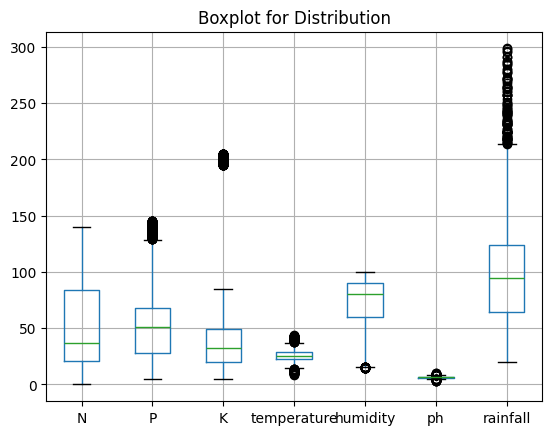

In [10]:
df.boxplot()
# Title
plt.title('Boxplot for Distribution')
plt.show()


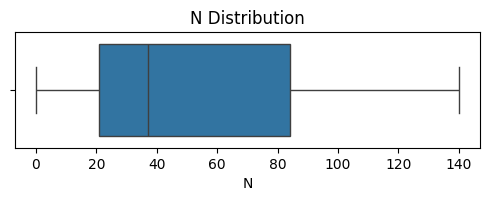

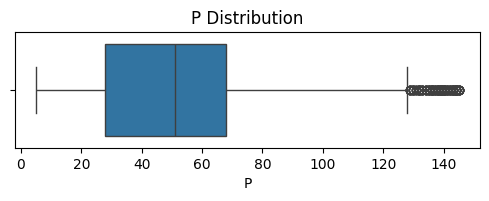

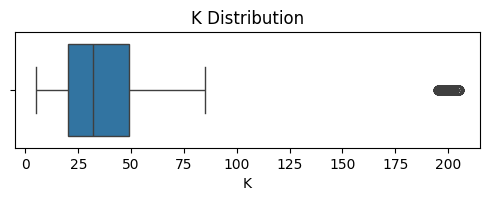

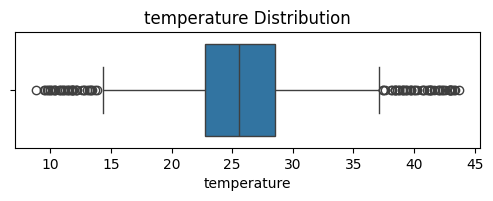

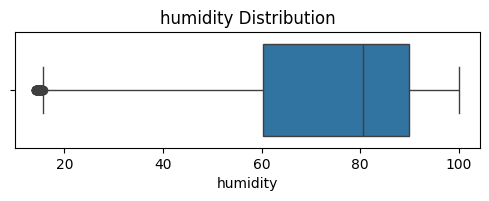

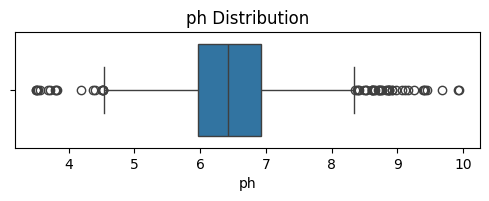

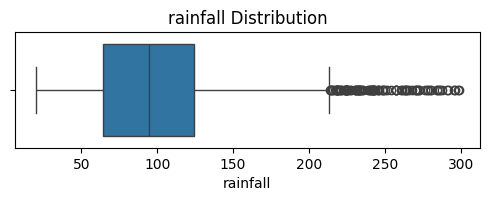

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.show()

In [12]:
# IQR method
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers per feature:\n", outliers)


Number of outliers per feature:
 N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
dtype: int64


# Note
## i will not remove outliers because some crops naturally require extreme values (e.g., rice needs more water).

--------

# STEP 2
- Data visualisation and model selection
In the second step, students will apply their data visualisation skills to better understand the data and propose the a regression model accordingly.

# 1. Correlation Heatmap
- Helps you spot relationships between features (e.g. temp ↔ humidity).



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

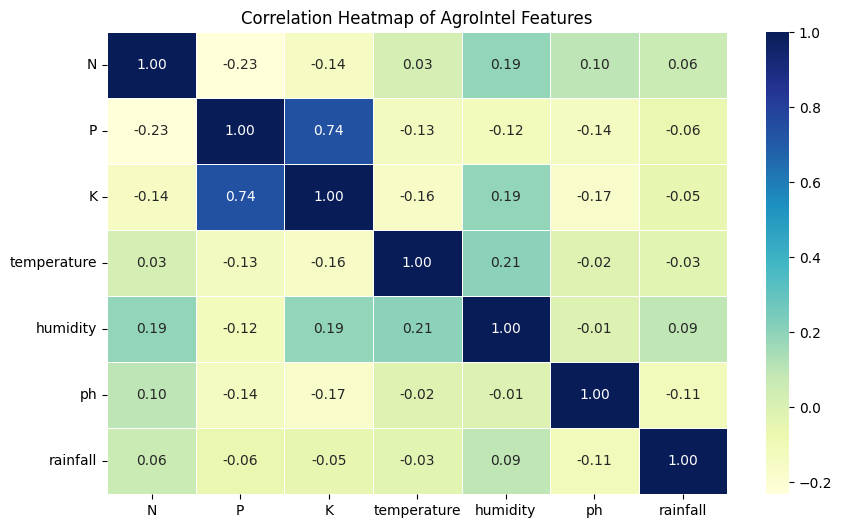

In [14]:
# Drop non-numeric column (label)
numeric_df = df.drop('label', axis=1)

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of AgroIntel Features")
plt.show()


# 2. Pairplot by Crop Label
See how crops are grouped by features like pH, temperature, rainfall.

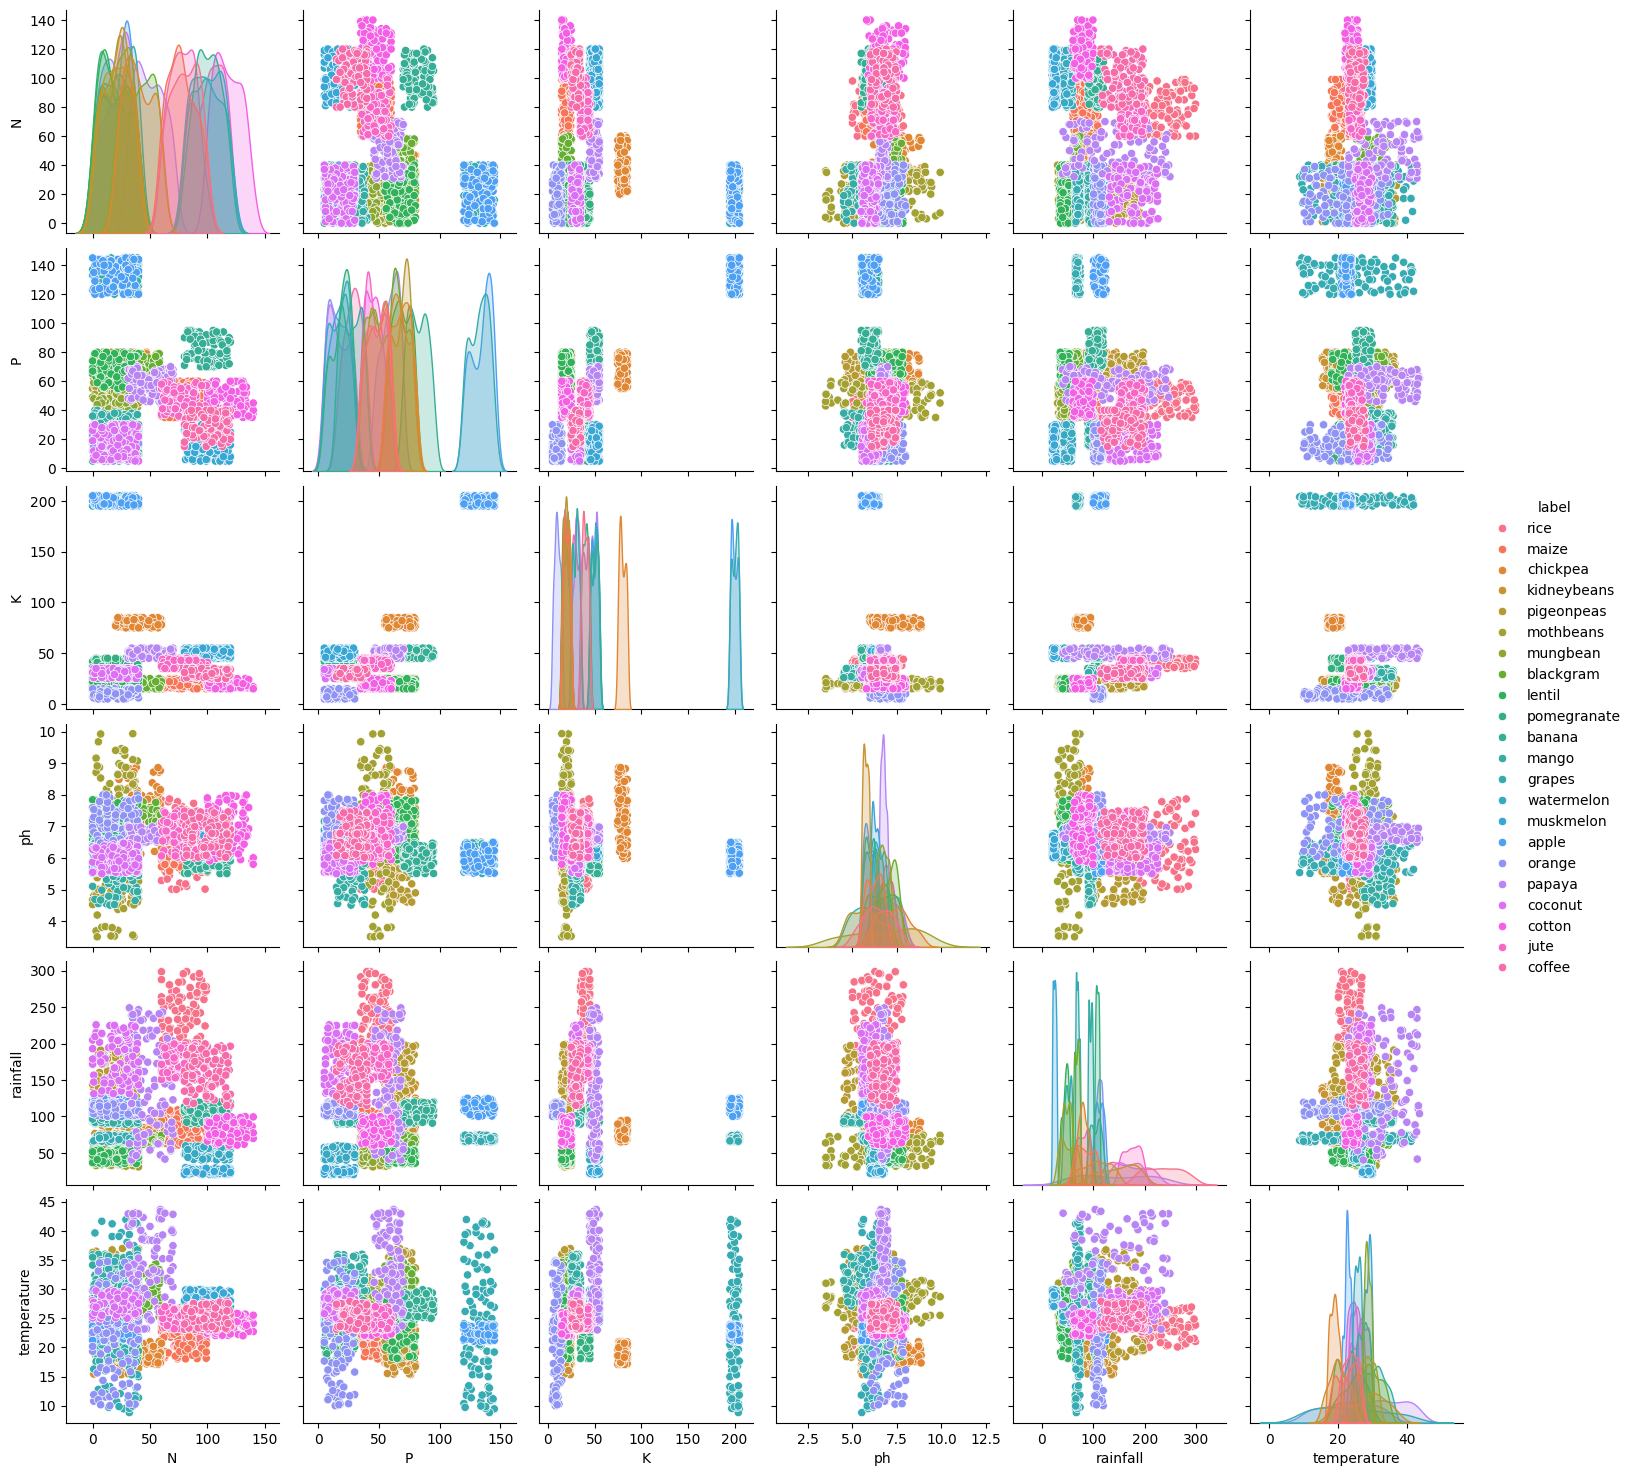

In [15]:
sns.pairplot(df[['N', 'P', 'K', 'ph', 'rainfall', 'temperature', 'label']], hue='label', palette='husl', diag_kind='kde')
plt.show()

# 3. Boxplots per Crop (Label)
See how each crop’s values vary for features.

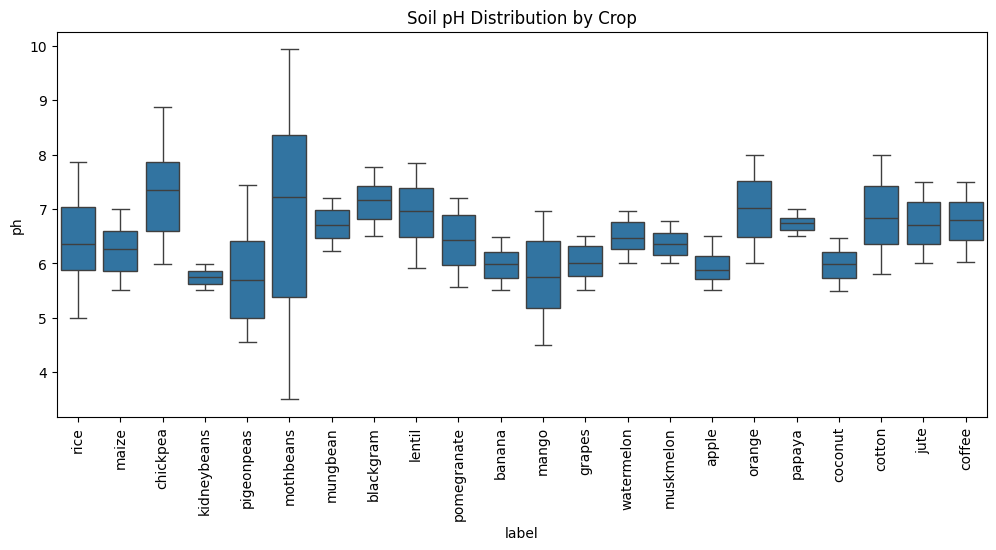

In [16]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='label', y='ph', data=df)
plt.xticks(rotation=90)
plt.title("Soil pH Distribution by Crop")
plt.show()

--------

## STEP 3
Model training and testing.
At this level, students shall train and search for the optimal parameters to get the desired results.

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])


In [18]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [19]:
#X = df.drop(['label', 'label_encoded'], axis=1)
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label_encoded']

# Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Base Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00 

 # Hyperparameter Tuning 
Use GridSearchCV to find the best parameters.

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [23]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      0.95      0.97        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       0.95      1.00      0.98        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00    

# STEP 4
Model deployment and monitoring
The final phase consists of choosing the right deployment strategy for your machine learning model and build your monitoring solution.

In [24]:
import joblib

# Save model and encoder
joblib.dump(best_model, 'agrointel_model.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']